In [24]:
import os
import pandas as pd
import numpy as np

In [25]:
from matplotlib import rc
import matplotlib.font_manager as fm
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 데이터 로드

#### 2015년 ~ 2021년 데이터 가져오기

In [27]:
df_lst = pd.read_csv('../data/주택도시보증공사_전국 신규 민간아파트 분양가격 동향.csv',encoding='utf-8')
df_lst

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879
...,...,...,...,...,...
6285,제주,모든면적,2021,11,"6,860"
6286,제주,전용면적 60제곱미터이하,2021,11,NaN
6287,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,11,"6,787"
6288,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,11,"5,924"


In [28]:
df_lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         6290 non-null   object
 1   규모구분        6290 non-null   object
 2   연도          6290 non-null   int64 
 3   월           6290 non-null   int64 
 4   분양가격(제곱미터)  5812 non-null   object
dtypes: int64(2), object(3)
memory usage: 245.8+ KB


#### 2013년 ~ 2015년 데이터 가져오기

In [29]:
df_fst = pd.read_csv('../data/전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',encoding='utf-8')

In [30]:
df_fst.head(3)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795


In [31]:
df_fst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   지역        17 non-null     object
 1   2013년12월  17 non-null     int64 
 2   2014년1월   17 non-null     int64 
 3   2014년2월   17 non-null     int64 
 4   2014년3월   17 non-null     int64 
 5   2014년4월   17 non-null     int64 
 6   2014년5월   17 non-null     int64 
 7   2014년6월   17 non-null     int64 
 8   2014년7월   17 non-null     int64 
 9   2014년8월   17 non-null     int64 
 10  2014년9월   17 non-null     int64 
 11  2014년10월  17 non-null     int64 
 12  2014년11월  17 non-null     int64 
 13  2014년12월  17 non-null     int64 
 14  2015년1월   17 non-null     int64 
 15  2015년2월   17 non-null     int64 
 16  2015년3월   17 non-null     int64 
 17  2015년4월   17 non-null     int64 
 18  2015년5월   17 non-null     int64 
 19  2015년6월   17 non-null     int64 
 20  2015년7월   17 non-null     int64 
 21  2015년8월   17 non-n

### 데이터 전처리

In [34]:
type(df_lst['분양가격(제곱미터)'])

pandas.core.series.Series

In [35]:
# 분양 가격의 데이터 타입을 알아보기 위함
type(df_lst['분양가격(제곱미터)'][6289])

str

In [36]:
# 분양가격의 ','를 제거하기 위함
df_lst['분양가격(제곱미터)'] = df_lst['분양가격(제곱미터)'].str.replace(',','')

In [37]:
df_lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         6290 non-null   object
 1   규모구분        6290 non-null   object
 2   연도          6290 non-null   int64 
 3   월           6290 non-null   int64 
 4   분양가격(제곱미터)  5812 non-null   object
dtypes: int64(2), object(3)
memory usage: 245.8+ KB


#### dtype 변경

In [38]:
# 분양가격의 값들을 숫자로 변경, NaN 값은 무시되는지 확인
pd.to_numeric(df_lst["분양가격(제곱미터)"], errors='coerce')

0       5841.0
1       5652.0
2       5882.0
3       5721.0
4       5879.0
         ...  
6285    6860.0
6286       NaN
6287    6787.0
6288    5924.0
6289    6815.0
Name: 분양가격(제곱미터), Length: 6290, dtype: float64

In [39]:
df_lst.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


#### 분양가격 컬럼 생성

In [40]:
# 분양가격의 값들을 숫자로 변경, NaN 값은 무시 하고 '분양가격' 열 생성
df_lst["분양가격"] = pd.to_numeric(df_lst["분양가격(제곱미터)"], errors='coerce')
df_lst.tail()

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격
6285,제주,모든면적,2021,11,6860,6860.0
6286,제주,전용면적 60제곱미터이하,2021,11,NaN,NaN
6287,제주,전용면적 60제곱미터초과 85제곱미터이하,2021,11,6787,6787.0
6288,제주,전용면적 85제곱미터초과 102제곱미터이하,2021,11,5924,5924.0
6289,제주,전용면적 102제곱미터초과,2021,11,6815,6815.0


#### 평당분양가격 컬럼 생성

In [41]:
# 분양가격은 제곱미터 기준이기 때문에 평수 기준으로 '평당분양가격' 열 생성
df_lst['평당분양가격'] = df_lst.분양가격*3.3
df_lst.평당분양가격

0       19275.3
1       18651.6
2       19410.6
3       18879.3
4       19400.7
         ...   
6285    22638.0
6286        NaN
6287    22397.1
6288    19549.2
6289    22489.5
Name: 평당분양가격, Length: 6290, dtype: float64

In [42]:
df_lst.head(2)

,지역명,규모구분,연도,월,분양가격(제곱미터),분양가격,평당분양가격
0,서울,모든면적,2015,10,5841,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652,5652.0,18651.6


In [43]:
df_lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         6290 non-null   object 
 1   규모구분        6290 non-null   object 
 2   연도          6290 non-null   int64  
 3   월           6290 non-null   int64  
 4   분양가격(제곱미터)  5812 non-null   object 
 5   분양가격        5781 non-null   float64
 6   평당분양가격      5781 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 344.1+ KB


In [19]:
df_lst.규모구분.unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

#### 규모구분을 전용면적 컬럼으로 변경

In [44]:
df_lst['전용면적'] = df_lst['규모구분'].str.replace('전용면적','')
df_lst['전용면적'] = df_lst['전용면적'].str.replace('제곱미터초과','~')
df_lst['전용면적'] = df_lst['전용면적'].str.replace('제곱미터이하','')
df_lst['전용면적'] = df_lst['전용면적'].str.replace(' ','').str.strip()
df_lst['전용면적']

0         모든면적
1           60
2        60~85
3       85~102
4         102~
         ...  
6285      모든면적
6286        60
6287     60~85
6288    85~102
6289      102~
Name: 전용면적, Length: 6290, dtype: object

In [45]:
df_lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         6290 non-null   object 
 1   규모구분        6290 non-null   object 
 2   연도          6290 non-null   int64  
 3   월           6290 non-null   int64  
 4   분양가격(제곱미터)  5812 non-null   object 
 5   분양가격        5781 non-null   float64
 6   평당분양가격      5781 non-null   float64
 7   전용면적        6290 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 393.2+ KB


In [46]:
# 중복되는 열 삭제
df_lst.drop(['규모구분','분양가격(제곱미터)'],axis=1,inplace=True)

In [47]:
df_lst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6290 entries, 0 to 6289
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역명     6290 non-null   object 
 1   연도      6290 non-null   int64  
 2   월       6290 non-null   int64  
 3   분양가격    5781 non-null   float64
 4   평당분양가격  5781 non-null   float64
 5   전용면적    6290 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 295.0+ KB


#### groupby 로 데이터 집계하기

In [62]:
# 지역별 평당분양가격의 평균
df_lst.groupby(['지역명']).평당분양가격.mean()

지역명
강원     8630.984078
경기    13803.320270
경남     9821.375900
경북     9043.574138
광주    11143.459223
대구    13077.543490
대전    10581.153846
부산    12586.699459
서울    25362.470959
세종    10379.998095
울산    11297.440909
인천    12996.175410
전남     8219.511667
전북     8047.690164
제주    13085.297315
충남     8603.278632
충북     7919.892391
Name: 평당분양가격, dtype: float64

In [63]:
# 전용면적별 평당분양가격의 평균
df_lst.groupby(['전용면적']).평당분양가격.mean()

전용면적
102~      12291.705282
60        11097.897199
60~85     11091.488952
85~102    11952.270987
모든면적      11110.922124
Name: 평당분양가격, dtype: float64

In [64]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_lst.groupby(['전용면적','지역명']).평당분양가격.mean().unstack().round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102~,9712.0,15236.0,10436.0,9834.0,12515.0,14088.0,14875.0,13392.0,25180.0,10536.0,11523.0,15220.0,9128.0,8524.0,12774.0,9069.0,8479.0
60,8328.0,13504.0,9060.0,8560.0,10324.0,12908.0,9951.0,12080.0,25035.0,10220.0,11210.0,12304.0,7703.0,7887.0,14199.0,8165.0,7466.0
60~85,8072.0,13046.0,9133.0,8622.0,10810.0,12890.0,10250.0,12480.0,24315.0,10350.0,11529.0,12435.0,7918.0,7651.0,13198.0,8222.0,7599.0
85~102,8992.0,14152.0,11345.0,9782.0,11587.0,12559.0,9078.0,12450.0,27895.0,10367.0,9904.0,12782.0,8442.0,8519.0,11200.0,9549.0,8524.0
모든면적,8110.0,13078.0,9171.0,8642.0,10925.0,12879.0,10300.0,12532.0,24376.0,10381.0,11456.0,12361.0,7916.0,7684.0,13309.0,8202.0,7547.0


In [67]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
g = df_lst.groupby(['연도','지역명']).평당분양가격.mean()

In [68]:
g.loc[2018]

지역명
강원     8219.255000
경기    14258.420000
경남     9327.670000
경북     8680.776923
광주     9526.953333
대구    12139.252632
대전    10234.106667
부산    12889.965000
서울    23202.245000
세종    10340.463158
울산    10241.400000
인천    11881.532143
전남     7929.845000
전북     8174.595000
제주    11935.968000
충남     8201.820000
충북     8149.295000
Name: 평당분양가격, dtype: float64

In [69]:
# transpose로 행, 열 바꿔서 보기좋게 DataFrame생성
g.unstack().transpose()

연도,2015,2016,2017,2018,2019,2020,2021
지역명,,,,,,,
강원,7188.060,7162.903846,7318.850000,8219.255000,8934.475000,10302.423214,10260.180000
경기,11060.940,11684.970000,12296.185000,14258.420000,15665.540000,15106.080000,14557.140000
경남,8459.220,8496.730000,8806.600000,9327.670000,10697.615789,10919.272222,11297.520000
경북,7464.160,7753.405000,8288.063793,8680.776923,9050.250000,9997.693750,11181.540000
광주,7916.700,9190.683333,9599.700000,9526.953333,12111.675000,13406.485714,13637.662500
대구,9018.900,10282.030000,12191.972222,12139.252632,14081.650000,15314.200000,15540.600000
대전,8190.600,8910.733333,9912.910526,10234.106667,12619.200000,11238.844737,11942.800000
부산,10377.400,10743.535000,11637.615000,12889.965000,13537.865000,13353.010000,14030.880000
서울,20315.680,21753.435000,21864.095000,23202.245000,28286.830000,29781.015000,29186.190000


#### pivot table로 데이터 집계하기
- groupby 로 했던 작업을 pivot_table로 똑같이 해보기

In [70]:
pd.pivot_table(df_lst,index=['지역명'],values=['평당분양가격'],aggfunc='mean')

,평당분양가격
지역명,
강원,8630.984078
경기,13803.320270
경남,9821.375900
경북,9043.574138
광주,11143.459223
대구,13077.543490
대전,10581.153846
부산,12586.699459
서울,25362.470959


In [71]:
pd.pivot_table(df_lst,index='전용면적',values='평당분양가격')

,평당분양가격
전용면적,
102~,12291.705282
60,11097.897199
60~85,11091.488952
85~102,11952.270987
모든면적,11110.922124


In [72]:
# 지역명, 전용면적으로 평당분양가격의 평균을 구합니다.
df_lst.pivot_table(index='전용면적',columns='지역명',values='평당분양가격').round()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
전용면적,,,,,,,,,,,,,,,,,
102~,9712.0,15236.0,10436.0,9834.0,12515.0,14088.0,14875.0,13392.0,25180.0,10536.0,11523.0,15220.0,9128.0,8524.0,12774.0,9069.0,8479.0
60,8328.0,13504.0,9060.0,8560.0,10324.0,12908.0,9951.0,12080.0,25035.0,10220.0,11210.0,12304.0,7703.0,7887.0,14199.0,8165.0,7466.0
60~85,8072.0,13046.0,9133.0,8622.0,10810.0,12890.0,10250.0,12480.0,24315.0,10350.0,11529.0,12435.0,7918.0,7651.0,13198.0,8222.0,7599.0
85~102,8992.0,14152.0,11345.0,9782.0,11587.0,12559.0,9078.0,12450.0,27895.0,10367.0,9904.0,12782.0,8442.0,8519.0,11200.0,9549.0,8524.0
모든면적,8110.0,13078.0,9171.0,8642.0,10925.0,12879.0,10300.0,12532.0,24376.0,10381.0,11456.0,12361.0,7916.0,7684.0,13309.0,8202.0,7547.0


In [73]:
# 연도, 지역명으로 평당분양가격의 평균을 구합니다.
p = pd.pivot_table(df_lst,index=['연도','지역명'],values='평당분양가격')

In [74]:
p.loc[2017]

,평당분양가격
지역명,
강원,7318.850000
경기,12296.185000
경남,8806.600000
경북,8288.063793
광주,9599.700000
대구,12191.972222
대전,9912.910526
부산,11637.615000
서울,21864.095000


### 2013년 9월 ~ 2015년 8월까지 데이터 전처리
- 필요한 정보(지역명, 연도, 평당분양가격)

In [75]:
df_lst.tail(1)

,지역명,연도,월,분양가격,평당분양가격,전용면적
6289,제주,2021,11,6815.0,22489.5,102~


In [76]:
df_fst.tail(1)

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
16,제주,7674,7900,7900,7900,7900,7900,7914,7914,7914,...,7724,7739,7739,7739,7826,7285,7285,7343,7343,7343


#### 결측치 확인

In [77]:
df_fst.isnull().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

#### melt로 df_lst와 형식 같게 만들기

In [78]:
df_fst = df_fst.melt(id_vars='지역',var_name='기간',value_name='평당분양가격')

In [79]:
df_fst.head()

,지역,기간,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [80]:
# df_first_melt 변수에 담겨진 컬럼의 이름을 ["지역명", "기간", "평당분양가격"] 으로 변경합니다.
df_fst.columns=['지역명','기간','평당분양가격']

#### 연도와 월을 분리하기

In [81]:
# '년'을 기준으로 '연도'와 '월'을 구분지음
def yearParser(data):
    year = int(data.split('년')[0])
    return year

In [82]:
yearParser('2013년12월')

2013

In [83]:
type(yearParser('2013년12월'))

int

In [84]:
# df_fst.기간.apply(lambda x : x.split('년')[0]) # 람다식
df_fst['연도'] = df_fst.기간.apply(yearParser)

In [85]:
# 위의 방식과 똑같이 적용할 수 있음
df_fst['월'] = df_fst.기간.apply(lambda x : x.split('년')[1].replace('월','')) # 람다식

In [86]:
df_fst.head(5)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [87]:
df_fst.head(1)

,지역명,기간,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12


In [88]:
df_lst.tail(10)

,지역명,연도,월,분양가격,평당분양가격,전용면적
6280,경남,2021,11,3240.0,10692.0,모든면적
6281,경남,2021,11,2994.0,9880.2,60
6282,경남,2021,11,3227.0,10649.1,60~85
6283,경남,2021,11,3987.0,13157.1,85~102
6284,경남,2021,11,3476.0,11470.8,102~
6285,제주,2021,11,6860.0,22638.0,모든면적
6286,제주,2021,11,NaN,NaN,60
6287,제주,2021,11,6787.0,22397.1,60~85
6288,제주,2021,11,5924.0,19549.2,85~102
6289,제주,2021,11,6815.0,22489.5,102~


In [89]:
cols = ['지역명', '연도', '월', '평당분양가격']

In [90]:
# 최근 데이터가 담긴 df_lst 에는 전용면적이 있습니다. 
# 이전 데이터에는 전용면적이 없기 때문에 "모든면적"만 사용하도록 합니다.
# loc를 사용해서 모든면적에 해당하는 면적만 copy로 복사해서 df_lst_prepare 변수에 담습니다.
df_lst_prepare = df_lst.loc[df_lst.전용면적=='모든면적',cols].copy()
# df_fst에서 공통된 컬럼만 가져온 뒤
# copy로 복사해서 df_fst_prepare 변수에 담습니다.
df_fst_prepare = df_fst[cols].copy()

In [91]:
df_fst_prepare.shape

(357, 4)

In [92]:
df_lst_prepare.shape

(1258, 4)

#### concat 으로 데이터 합치기

In [93]:
df = pd.concat([df_fst_prepare,df_lst_prepare])

In [94]:
df.reset_index(drop=True,inplace=True)

### 데이터 시각화 하기

<AxesSubplot:xlabel='지역명'>

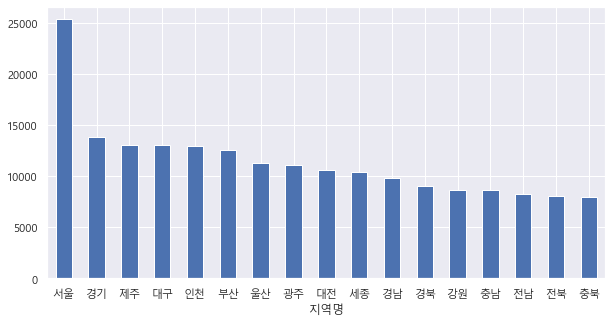

In [95]:
# 지역명으로 평당분양가격의 평균을 구하고 막대그래프(bar)로 시각화 합니다.
g = df_lst.groupby(["지역명"])["평당분양가격"].mean().sort_values(ascending=False)
g.plot.bar(rot=0,figsize=(10,5))

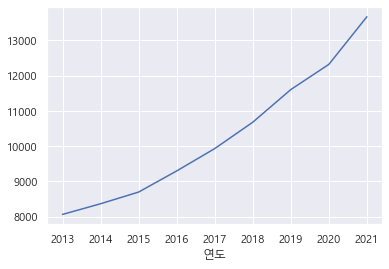

In [96]:
# 연도에 소숫점이 생기지 않게 표시하고자 한다면 ax.xaxis.set_major_locator를 사용해서 integer로 설정합니다.
ax = plt.figure().gca()
df.groupby(["연도"])["평당분양가격"].mean().plot()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

#### Seaborn 으로 시각화 해보기

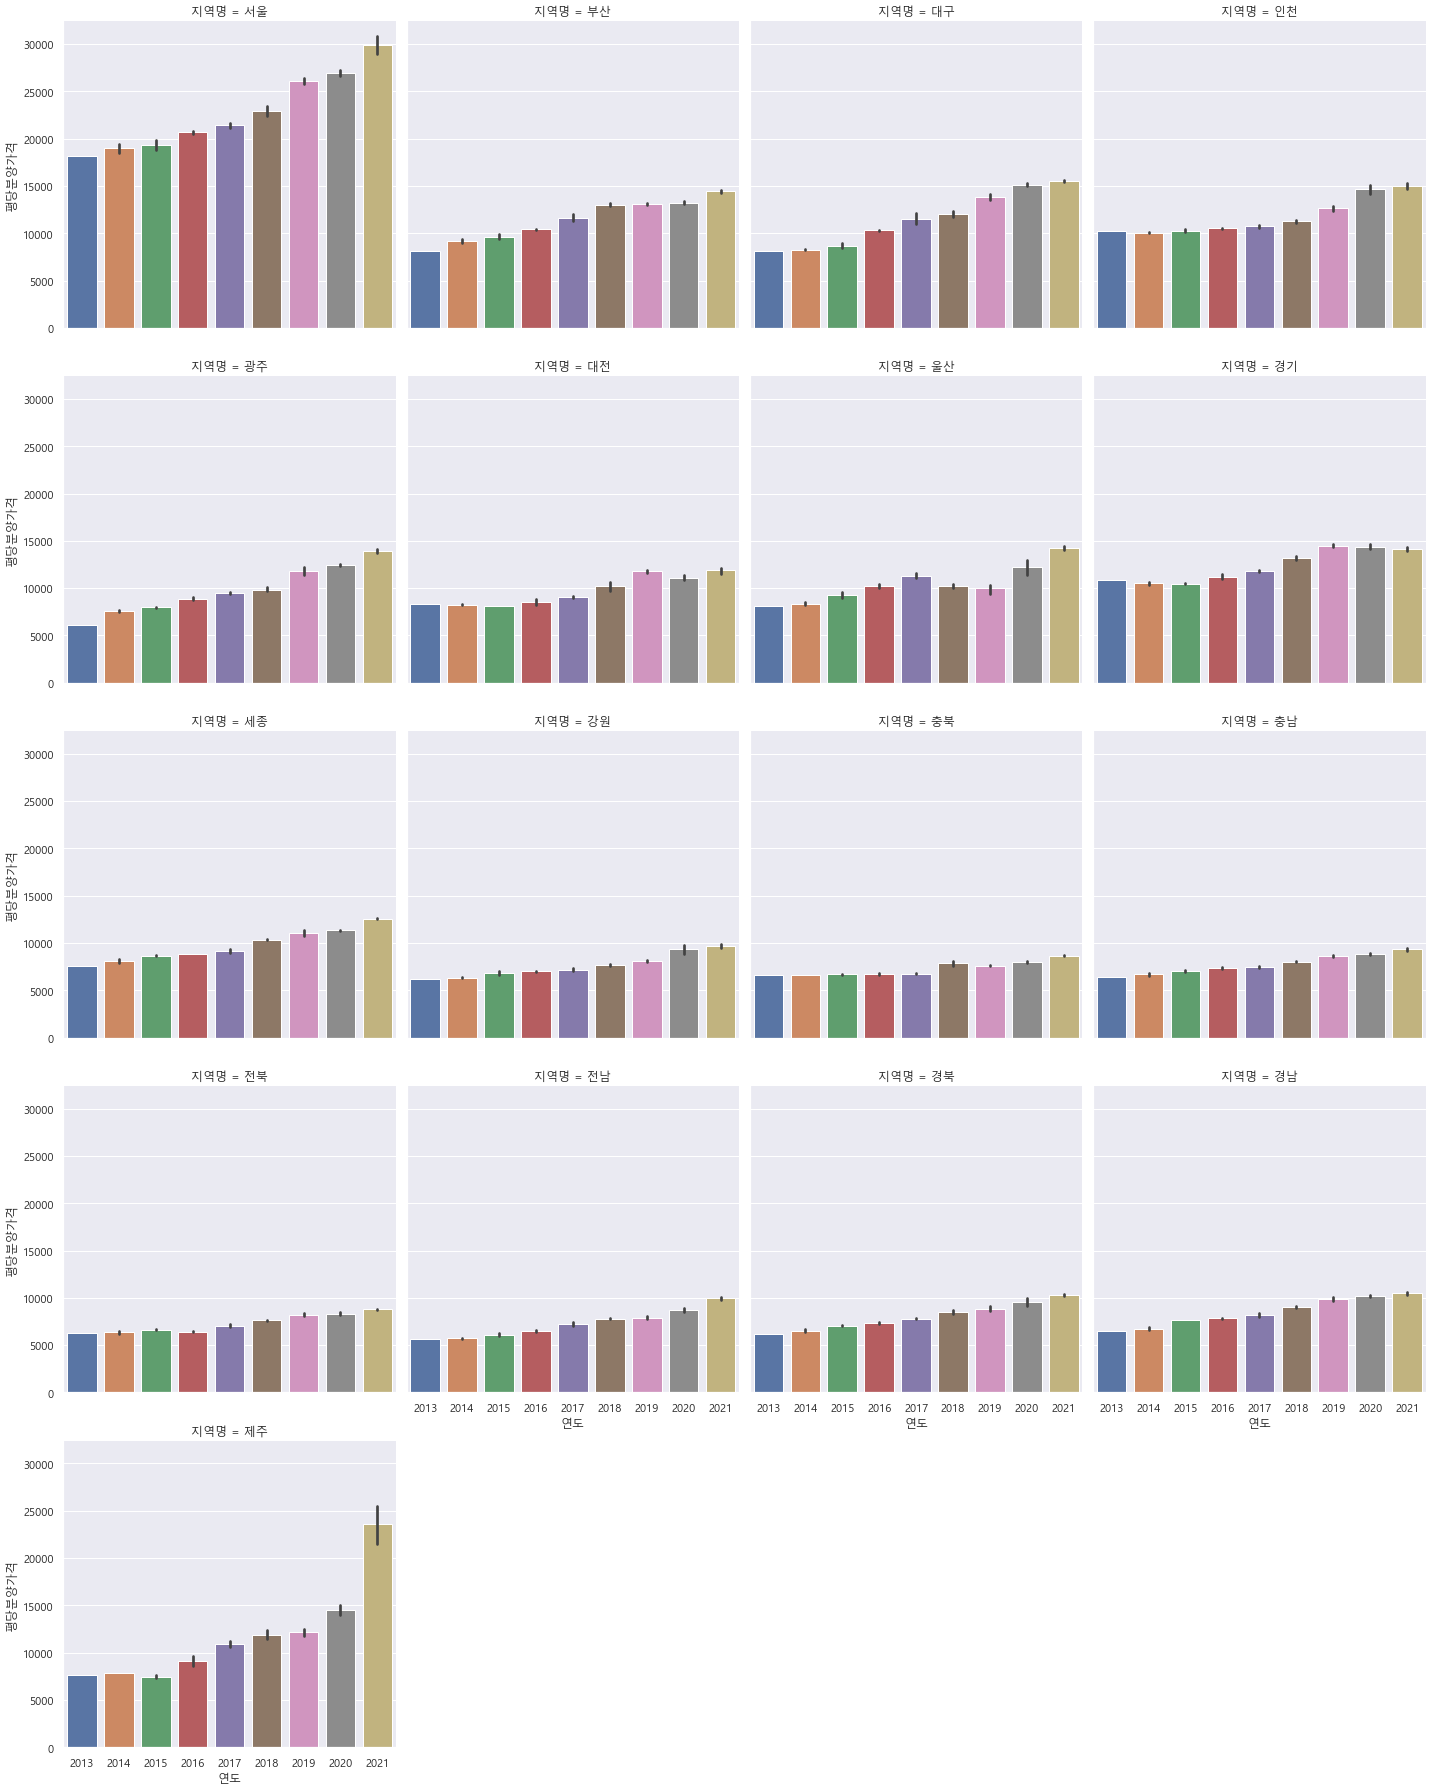

In [97]:
# 연도별 평당분양가격을 그려봅니다.
sns.catplot(data=df, x="연도", y="평당분양가격", kind="bar", col="지역명", col_wrap=4)

lineplot

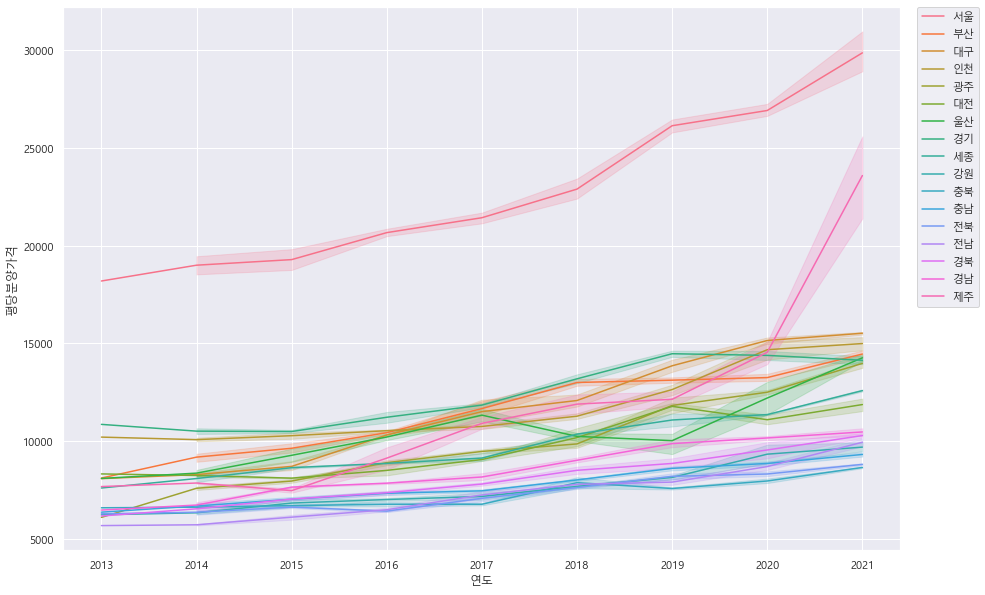

In [98]:
# lineplot으로 연도별 평당분양가격을 그려봅니다.
# hue 옵션을 통해 지역별로 다르게 표시해 봅니다.
plt.figure(figsize=(15, 10))
sns.lineplot(data=df, x="연도", y="평당분양가격", hue="지역명")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

boxplot과 violinplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

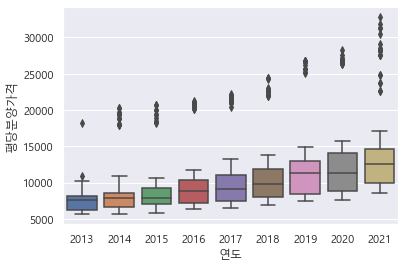

In [99]:
# 연도별 평당분양가격을 boxplot으로 그려봅니다.
# 최솟값
# 제 1사분위수
# 제 2사분위수( ), 즉 중앙값
# 제 3 사분위 수( )
# 최댓값
sns.boxplot(data=df, x="연도", y="평당분양가격")

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

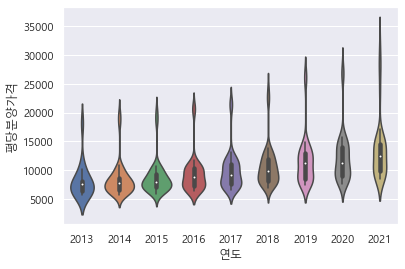

In [100]:
# 연도별 평당분양가격을 violinplot으로 그려봅니다.
sns.violinplot(data=df, x="연도", y="평당분양가격")

regplot

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

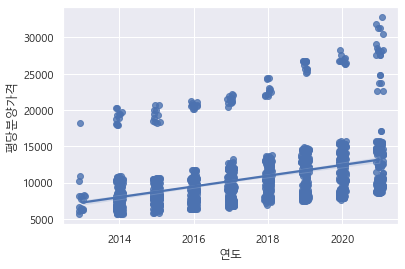

In [101]:
sns.regplot(data=df, x="연도", y="평당분양가격", x_jitter=.1)

swarmplot

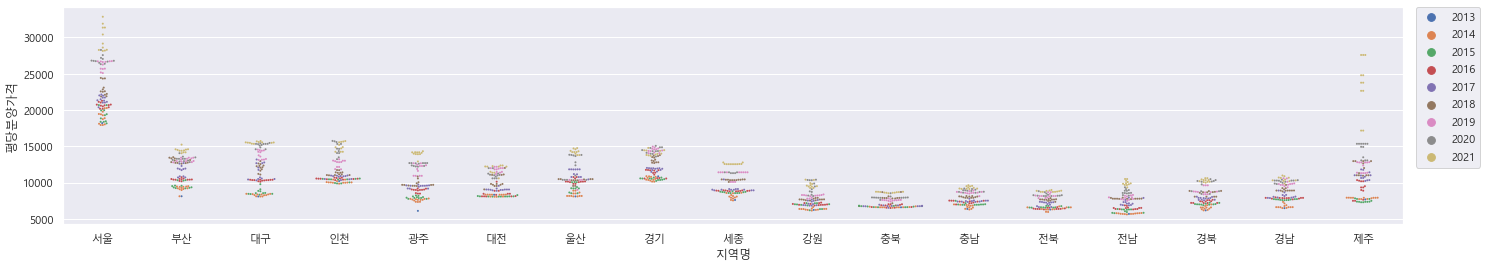

In [103]:
# swarmplot 으로 지역별 평당분양가격을 그려봅니다.
plt.figure(figsize=(24, 4))
sns.swarmplot(data=df, x="지역명", y="평당분양가격", hue="연도", size=2)
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

#### 히스토그램

displot

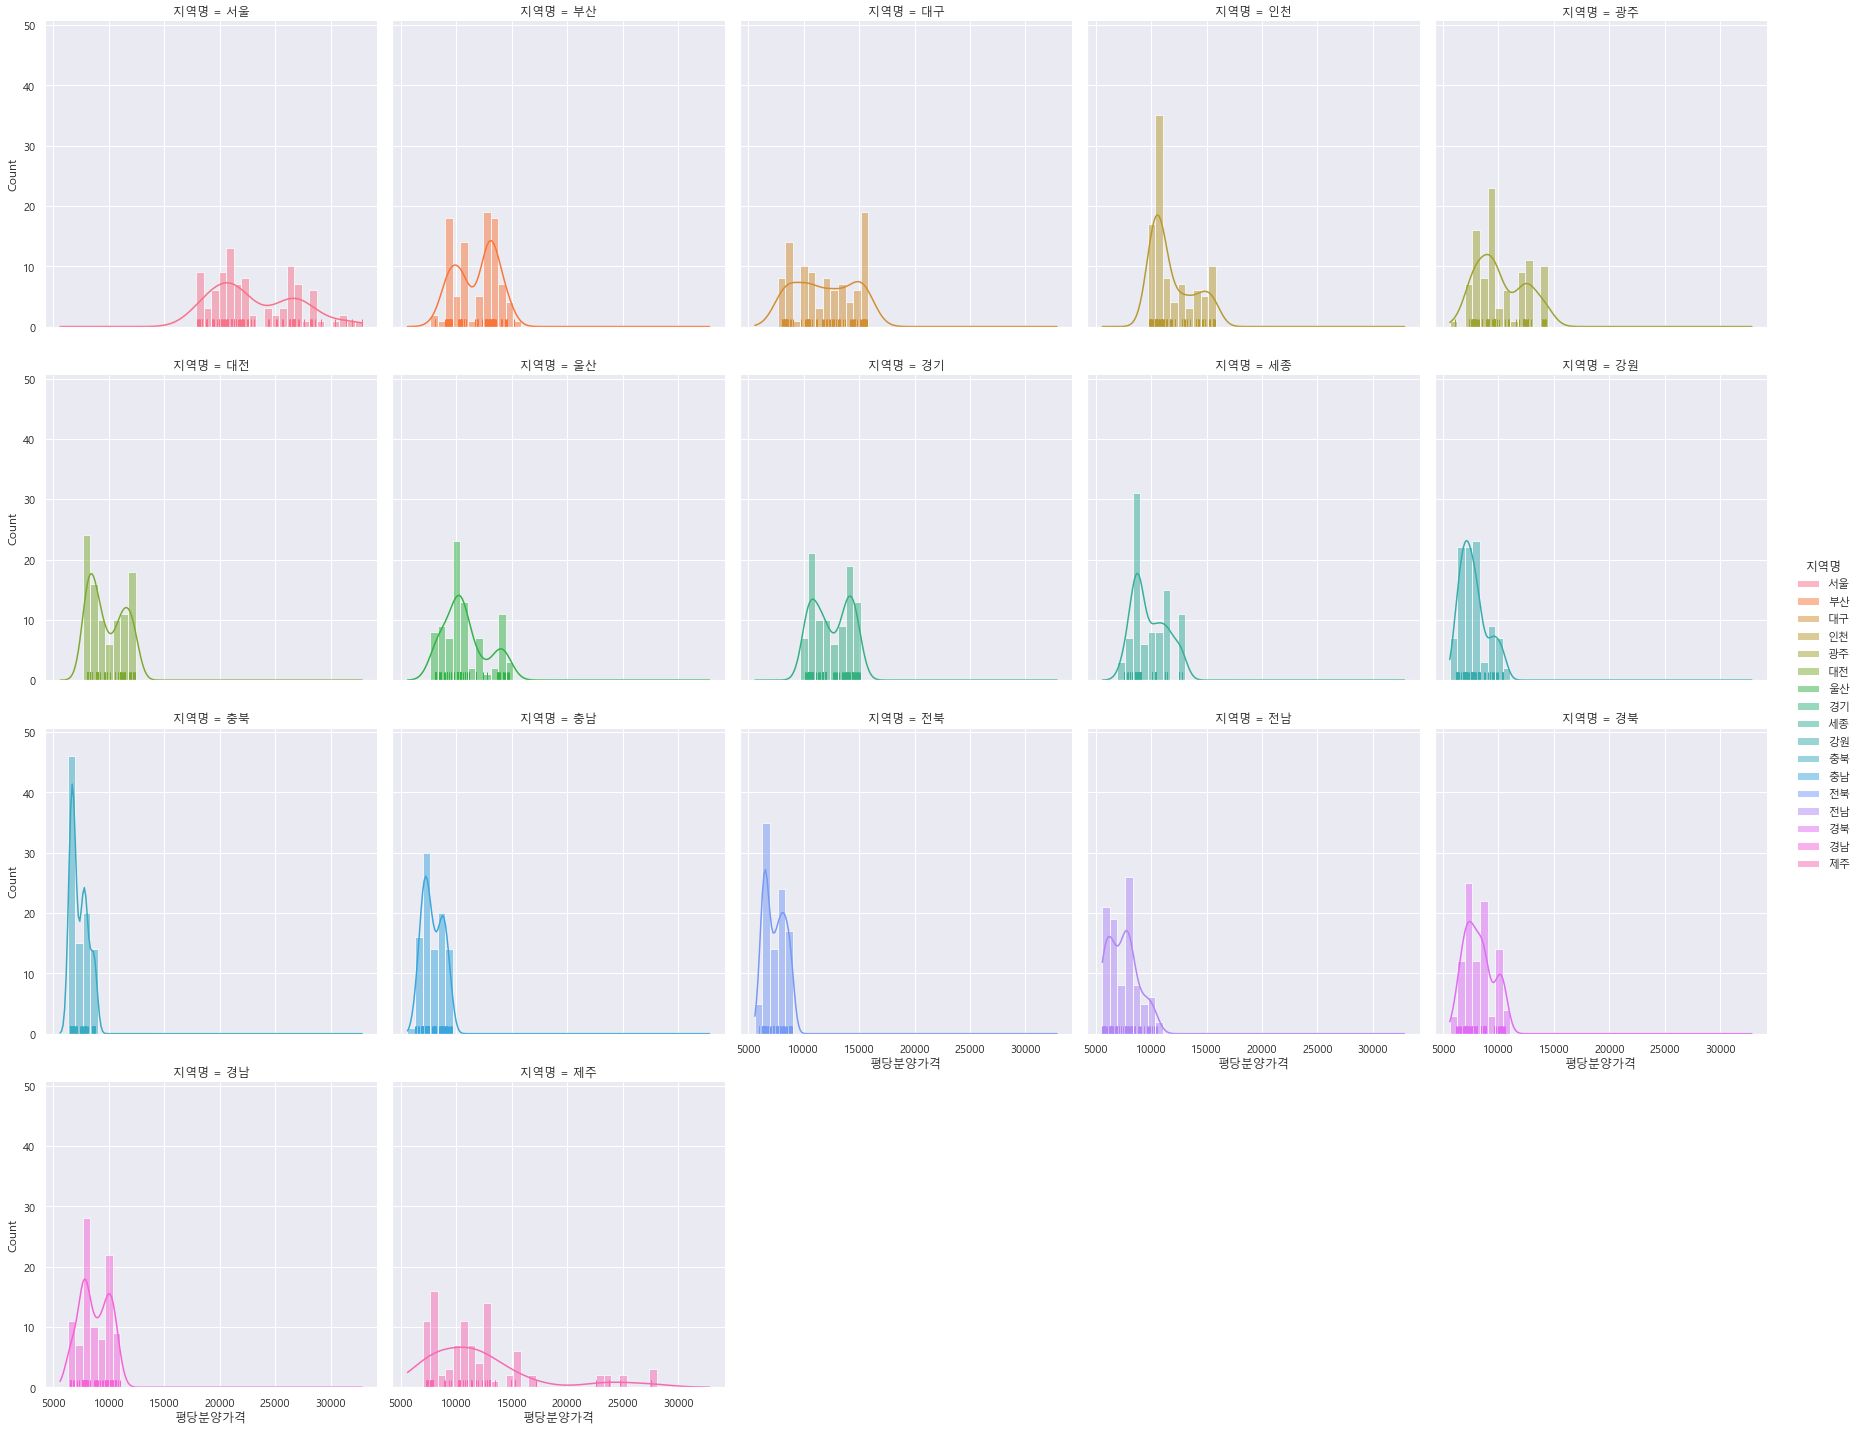

In [104]:
sns.displot(data=df, x="평당분양가격", kde=True, rug=True, hue="지역명",col='지역명',col_wrap=5)

pairplot

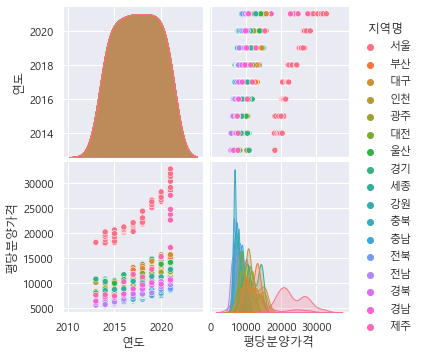

In [105]:
sns.pairplot(df, hue="지역명")

#### 히트맵

<AxesSubplot:xlabel='지역명', ylabel='연도'>

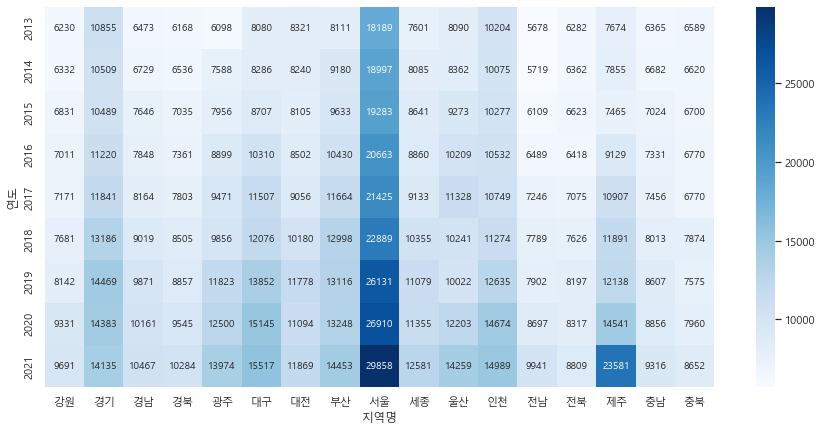

In [106]:
# 피봇테이블을 히트맵으로 표현해 봅니다.
t = pd.pivot_table(df, index="연도", columns="지역명",values="평당분양가격").round()
plt.figure(figsize=(15, 7))
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

In [107]:
df.to_csv('../data/지역별_연도별_평당_분양_가격.csv',encoding='utf-8')